In [1]:
%pip install numpy pandas matplotlib -q

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\raghuram\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [2]:
import os
import sys

import matplotlib.pyplot as plt
import pandas as pd

In [3]:
from src.plotData import plotData
from src.cellData import cellData
from src.cellExtractOCV import cellExtractOCV
from src.cellSim import cellSim

In [4]:
def main():
    """define cell filename"""
    pathname = (
        "datasets/lg-18650hg2/LG_HG2_Original_Dataset_McMasterUniversity_Jan_2020/"
    )
    temp = "25degC/"
    filenames = [
        filename
        for filename in os.listdir(pathname + temp)
        if filename.endswith(".csv")
    ]
    d = pd.DataFrame(filenames)
    d.to_csv("filenames.csv", header=None, index=False)
    filename = temp + "549_C20DisCh.csv"

    """extract from dataset"""
    cellDataObj = cellData(filename, pathname)
    plotDataObj = plotData()

    cellDataObj.extractData()

    plotDataObj.plotDataFromDataset(cellDataObj)

    """extract and save OCV functions"""
    cellExtractOCVObj = cellExtractOCV(cellDataObj)

    cellExtractOCVObj.runOCV()

    plotDataObj.plotComputedOCV(cellExtractOCVObj)

    """extract and save dynamic functions"""
    filename = temp + "551_Mixed1.csv"
    cellDataObj = cellData(filename, pathname)

    cellDataObj.extractData()

    cellSimObj = cellSim(cellDataObj)

    cellSimObj.runSimLoad()

    plotDataObj.plotLoadedOCV(cellSimObj)
    plotDataObj.plotDynamic(cellSimObj)

    plt.show()

extract data done from 25degC/549_C20DisCh.csv
extract OCV done
compute OCV done
save OCV done
extract data done from 25degC/551_Mixed1.csv
load OCV done
extract dynamic done
load cell params done
cell sim done
RMS error =  67.45174020149936


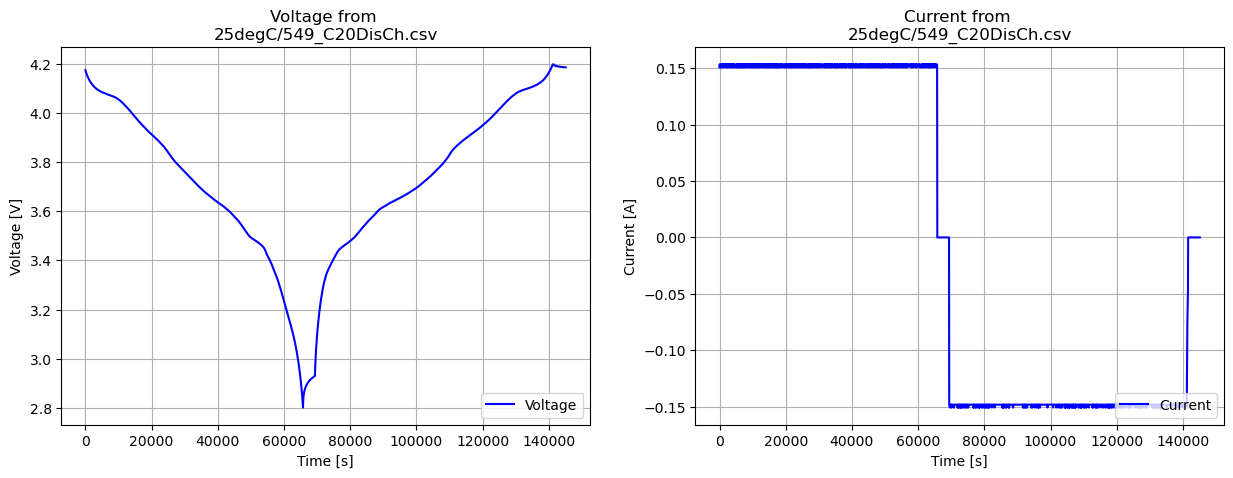

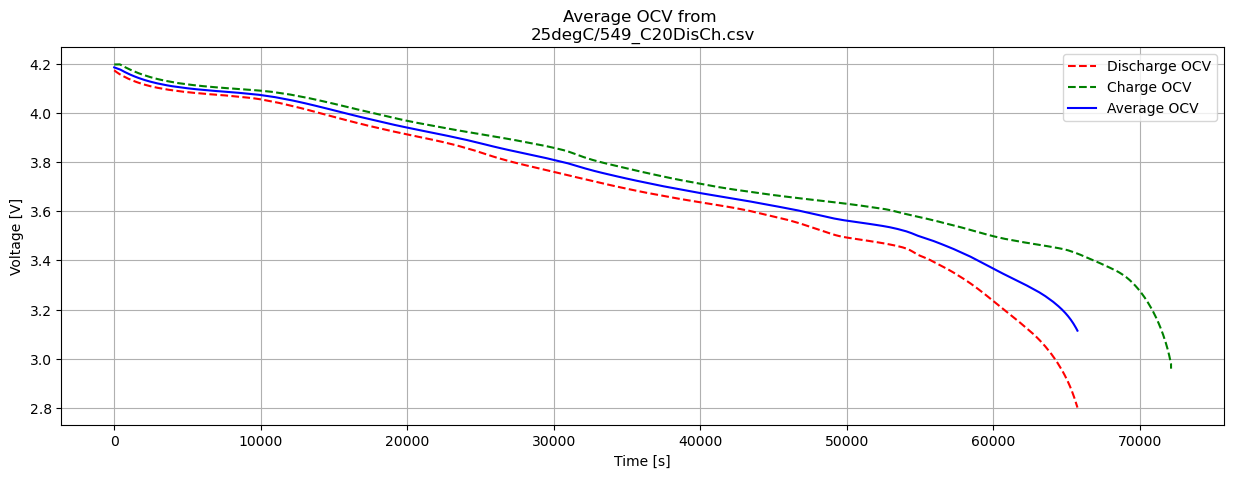

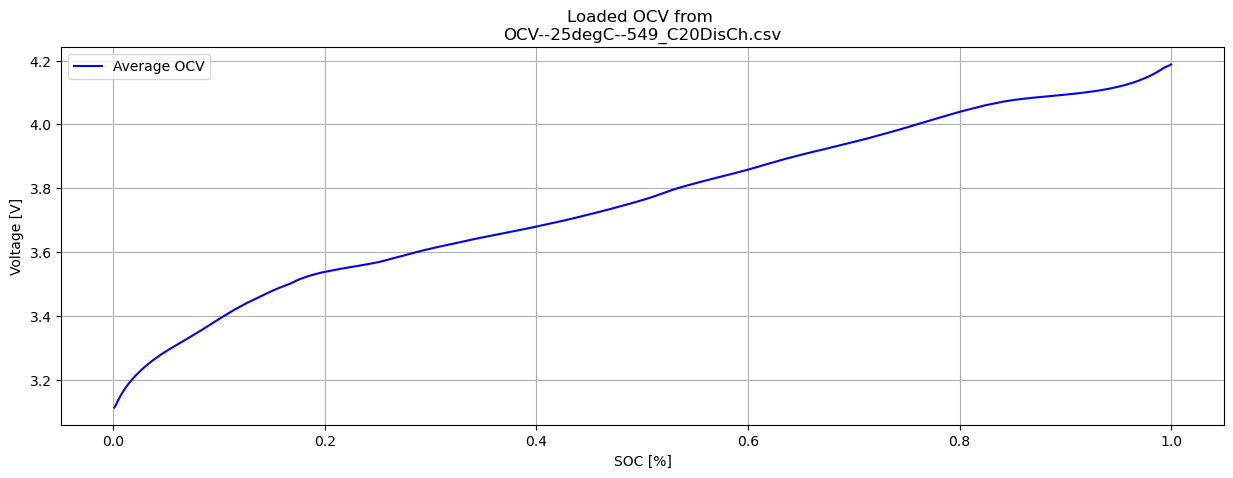

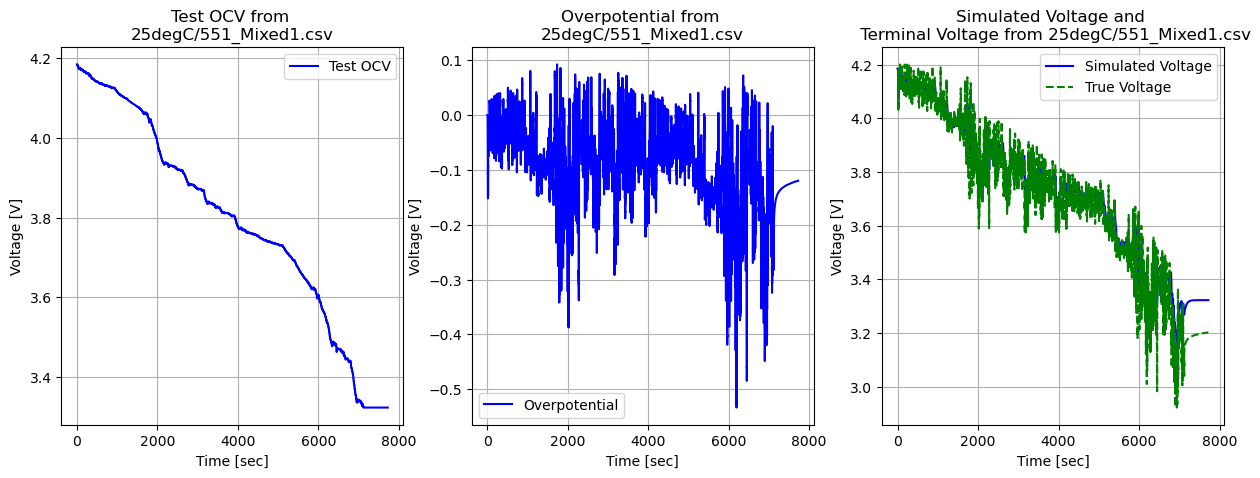

In [5]:
if __name__ == "__main__":
    main()